# User Based Clustering Filtering - Firdaus Adi Nugroho
Collaborative filtering (CF) is a technique commonly used to build personalized recommendations on the Web. Some popular websites that make use of the collaborative filtering technology include Amazon, Netflix, iTunes, IMDB, LastFM, Delicious and StumbleUpon. In collaborative filtering, algorithms are used to make automatic predictions about a user's interests by compiling preferences from several users.<br>
<br>Collaborative Filtering, on the other hand, doesn’t need anything else except users’ historical preference on a set of items. Because it’s based on historical data, the core assumption here is that the users who have agreed in the past tend to also agree in the future. In terms of user preference, it usually expressed by two categories. In this case, we are focusing on movie based on rating

In [168]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data Reprocessing

In [169]:
# load the dataset

datamovie = pd.read_csv('film_kelas.csv',delimiter=',')
datamovie.head()

,Timestamp,Nama Anda,Ada Apa dengan Cinta 2,Gundala,Dilan 1991,Bumi Manusia,Dua Garis Biru,Avengers: End Game,The Lion King,Aladdin,Spiderman: Far From Home,Captain Marvel
0,2019/09/17 10:18:21 AM GMT+7,Hania,3,5,4,4,4,0,0,0,0,0
1,2019/09/17 10:18:37 AM GMT+7,Topik Zulkarnain,0,0,0,0,0,5,5,0,4,2
2,2019/09/17 10:18:39 AM GMT+7,AhokTemanFirli,0,0,0,0,0,3,0,0,0,4
3,2019/09/17 10:18:42 AM GMT+7,franadek,4,4,4,5,3,5,4,5,4,4
4,2019/09/17 10:19:01 AM GMT+7,OM INDRA,3,0,2,0,5,5,0,1,5,5


In [170]:
# Delete Timestamp collumn

datamovie.drop(['Timestamp'],axis=1,inplace=True)
datamovie.head()

,Nama Anda,Ada Apa dengan Cinta 2,Gundala,Dilan 1991,Bumi Manusia,Dua Garis Biru,Avengers: End Game,The Lion King,Aladdin,Spiderman: Far From Home,Captain Marvel
0,Hania,3,5,4,4,4,0,0,0,0,0
1,Topik Zulkarnain,0,0,0,0,0,5,5,0,4,2
2,AhokTemanFirli,0,0,0,0,0,3,0,0,0,4
3,franadek,4,4,4,5,3,5,4,5,4,4
4,OM INDRA,3,0,2,0,5,5,0,1,5,5


Timestamp is deleted because the collumn no longer neccessary anymore. we just need name collumn and films collumn

In [171]:
# set "nama anda" as an index

datamovie.set_index(['Nama Anda'],inplace=True)
datamovie.head()

,Ada Apa dengan Cinta 2,Gundala,Dilan 1991,Bumi Manusia,Dua Garis Biru,Avengers: End Game,The Lion King,Aladdin,Spiderman: Far From Home,Captain Marvel
Nama Anda,,,,,,,,,,
Hania,3,5,4,4,4,0,0,0,0,0
Topik Zulkarnain,0,0,0,0,0,5,5,0,4,2
AhokTemanFirli,0,0,0,0,0,3,0,0,0,4
franadek,4,4,4,5,3,5,4,5,4,4
OM INDRA,3,0,2,0,5,5,0,1,5,5


In [172]:
datamovie1 = datamovie.transpose()

In [173]:
datamovie1

Nama Anda,Hania,Topik Zulkarnain,AhokTemanFirli,franadek,OM INDRA,Mulya,Genjeh,faizah,Dpv,Putrisqiana,...,bunga,Jawaharal,Febi ganteng gak ada obat,Star,Indra Junior,Indra 1991 SM,Damar Teman Firli,jul,luck,Maria O.
Ada Apa dengan Cinta 2,3,0,0,4,3,0,5,3,5,4,...,0,2,4,4,4,0,5,0,3,0
Gundala,5,0,0,4,0,0,4,0,4,3,...,4,4,3,4,0,5,0,3,0,0
Dilan 1991,4,0,0,4,2,0,3,5,4,2,...,4,3,4,0,0,0,0,0,0,0
Bumi Manusia,4,0,0,5,0,0,0,5,0,4,...,0,0,0,0,0,0,0,0,0,0
Dua Garis Biru,4,0,0,3,5,0,0,4,0,3,...,0,5,0,0,4,0,0,3,0,0
Avengers: End Game,0,5,3,5,5,4,5,5,5,5,...,5,5,5,5,5,0,5,3,4,0
The Lion King,0,5,0,4,0,2,0,0,0,0,...,5,4,0,5,5,0,0,3,0,5
Aladdin,0,0,0,5,1,5,5,0,0,0,...,5,5,5,5,5,0,0,3,0,4
Spiderman: Far From Home,0,4,0,4,5,4,4,0,5,4,...,5,5,5,0,5,0,5,3,0,0
Captain Marvel,0,2,4,4,5,3,4,0,5,3,...,5,4,4,5,5,0,0,3,2,0


The data should be transpposed because we are going to set the correlation each collumn and row. so the collumn and the row will balance after we transpose

In [175]:
datamovie_cor = datamovie1.corr(method='pearson')

The Pearson correlation coefficient is used to measure the strength of a linear association between two variables, where the value r = 1 means a perfect positive correlation and the value r = -1 means a perfect negataive correlation. So, for example, you could use this test to find out whether people's height and weight are correlated (they will be - the taller people are, the heavier they're likely to be).

Requirements for Pearson's correlation coefficient
- Scale of measurement should be interval or ratio<br>
- Variables should be approximately normally distributed<br>
- The association should be linear<br>
- There should be no outliers in the data<br><br>
Equation
<img src="pearson.png" alt="Smiley face" height="500" width="500"/>


In [154]:
datamovie_cor

Nama Anda,Hania,Topik Zulkarnain,AhokTemanFirli,franadek,OM INDRA,Mulya,Genjeh,faizah,Dpv,Putrisqiana,...,bunga,Jawaharal,Febi ganteng gak ada obat,Star,Indra Junior,Indra 1991 SM,Damar Teman Firli,jul,luck,Maria O.
Nama Anda,,,,,,,,,,,,,,,,,,,,,
Hania,1.000000,-0.741027,-0.481843,-0.325300,-0.339788,-0.905908,-0.309524,0.451097,-0.105381,0.213478,...,-0.667458,-0.502906,-0.404762,-0.505830,-0.845447,0.487950,-0.319438,-0.532397,-0.303770,-0.484228
Topik Zulkarnain,-0.741027,1.000000,0.394996,0.142374,0.295226,0.567809,0.023157,-0.213100,0.209087,0.065255,...,0.588579,0.421870,0.115785,0.311580,0.588579,-0.253109,0.434959,0.497096,0.315142,0.277343
AhokTemanFirli,-0.481843,0.394996,1.000000,0.188092,0.550113,0.414680,0.344173,-0.012420,0.469181,0.326222,...,0.382716,0.231720,0.344173,0.469181,0.382716,-0.164581,0.138527,0.323230,0.668420,-0.244988
franadek,-0.325300,0.142374,0.188092,1.000000,-0.324967,0.464140,0.325300,0.117393,-0.043193,0.041667,...,0.258378,-0.257663,0.325300,0.316752,-0.045596,-0.111111,0.145479,-0.145479,0.253629,0.202150
OM INDRA,-0.339788,0.295226,0.550113,-0.324967,1.000000,0.316025,0.294483,0.138971,0.505311,0.528071,...,0.046568,0.472487,0.385093,-0.116302,0.554587,-0.402340,0.526787,0.283654,0.500948,-0.496529
Mulya,-0.905908,0.567809,0.414680,0.464140,0.316025,1.000000,0.478118,-0.444977,0.102466,-0.174052,...,0.719540,0.611245,0.578774,0.436596,0.719540,-0.309426,0.292597,0.607701,0.206900,0.392362
Genjeh,-0.309524,0.023157,0.344173,0.325300,0.294483,0.478118,1.000000,-0.236289,0.716592,0.213478,...,0.422724,0.314316,0.952381,0.463677,0.244735,0.162650,0.532397,0.106479,0.540035,-0.188311
faizah,0.451097,-0.213100,-0.012420,0.117393,0.138971,-0.444977,-0.236289,1.000000,-0.030424,0.478745,...,-0.554002,-0.436704,-0.193327,-0.467765,-0.393422,-0.322832,0.134491,-0.614816,0.280149,-0.480554
Dpv,-0.105381,0.209087,0.469181,-0.043193,0.505311,0.102466,0.716592,-0.030424,1.000000,0.583111,...,0.287540,0.122423,0.716592,0.141791,0.051206,0.172774,0.622088,-0.056553,0.591575,-0.600095


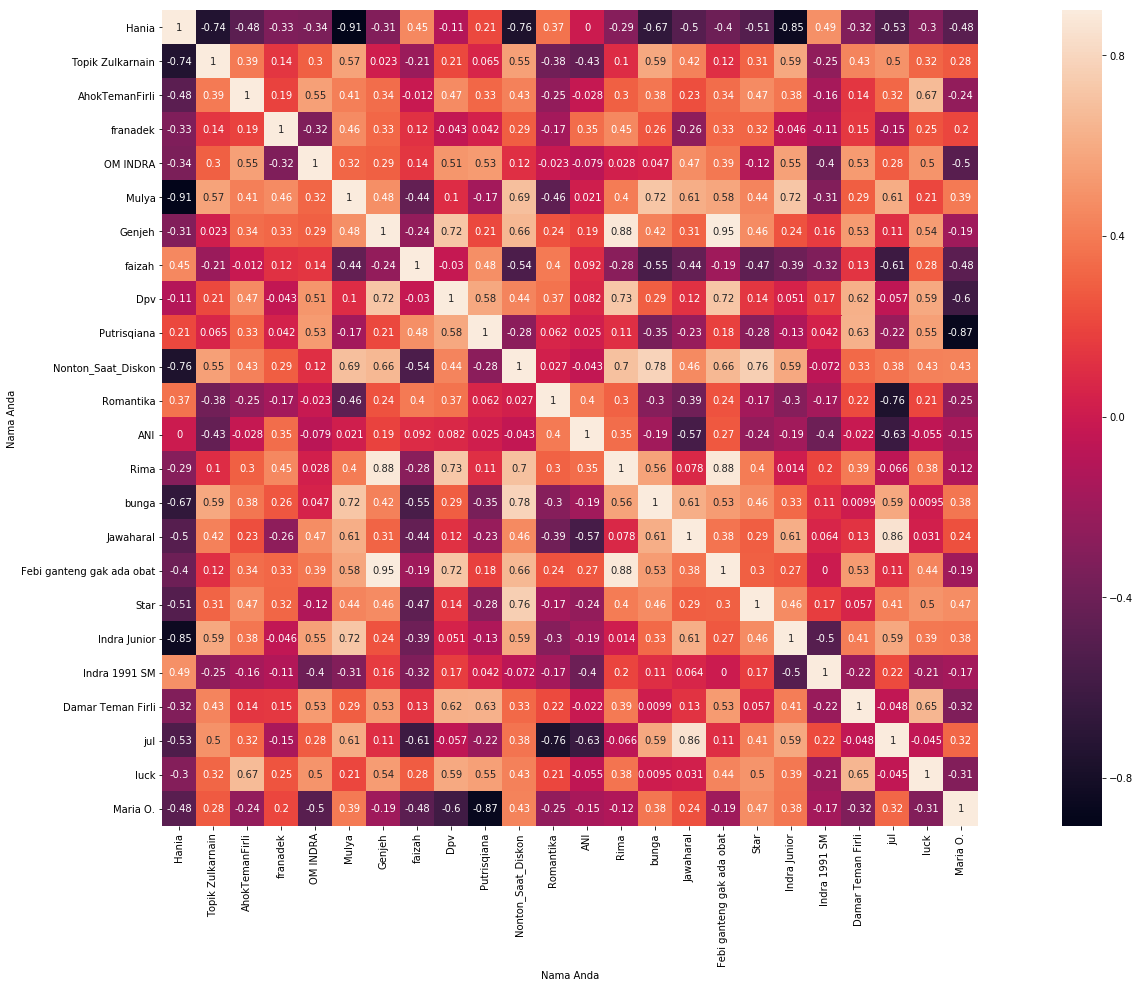

In [176]:
#create correlation with hitmap

#from this correlation, we know the value percentages of the correlation(1 or -1). The bigger value, so the correlation has big value too.
#weather has big correlation with the lattitude (-0,78). 

#create correlation
corr = datamovie1.corr(method = 'pearson')

#convert correlation to numpy array
mask = np.array(corr)

#to mask the repetitive value for each pair
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots(figsize = (15,12))
fig.set_size_inches(30,15)
sns.heatmap(corr, vmax = 0.9, square = True, annot = True)

This is the heatmap model of the pearson correlation. so we can see the corellation between film collumn and the name. Bigger value of correlation that means bigger too the correlation every single row

In [178]:
datamovie_cor['Febi ganteng gak ada obat'].sort_values(ascending=False)

Nama Anda
Febi ganteng gak ada obat    1.000000
Genjeh                       0.952381
Rima                         0.882735
Dpv                          0.716592
Nonton_Saat_Diskon           0.657713
Mulya                        0.578774
bunga                        0.533967
Damar Teman Firli            0.532397
luck                         0.438779
OM INDRA                     0.385093
Jawaharal                    0.377179
AhokTemanFirli               0.344173
franadek                     0.325300
Star                         0.295067
ANI                          0.267041
Indra Junior                 0.266983
Romantika                    0.243975
Putrisqiana                  0.182981
Topik Zulkarnain             0.115785
jul                          0.106479
Indra 1991 SM                0.000000
Maria O.                    -0.188311
faizah                      -0.193327
Hania                       -0.404762
Name: Febi ganteng gak ada obat, dtype: float64

In this case, we spesificly choose "Febi ganteng gak ada obat" rows. We can see the result, Genjeh is the closest of correlation to Febi ganteng gak ada obat

In [179]:
user_corr = datamovie_cor[['Febi ganteng gak ada obat']].loc[(datamovie_cor['Febi ganteng gak ada obat']>0) & (datamovie_cor['Febi ganteng gak ada obat']<1)]
user_corr

Nama Anda,Febi ganteng gak ada obat
Nama Anda,
Topik Zulkarnain,0.115785
AhokTemanFirli,0.344173
franadek,0.325300
OM INDRA,0.385093
Mulya,0.578774
Genjeh,0.952381
Dpv,0.716592
Putrisqiana,0.182981
Nonton_Saat_Diskon,0.657713


This result is calling value that have more than 0 and les than 1

In [180]:
userr_corr = user_corr.iloc[5:10].sort_values(by='Febi ganteng gak ada obat', ascending=False)
userr_corr

Nama Anda,Febi ganteng gak ada obat
Nama Anda,
Genjeh,0.952381
Dpv,0.716592
Nonton_Saat_Diskon,0.657713
Romantika,0.243975
Putrisqiana,0.182981


this result above, we select just only 5 best value of correlation from Febi ganteng gak ada obat

In [181]:
user_cor_rat = datamovie
user_cor_rat = user_cor_rat.transpose()
user_cor_rat = user_cor_rat.loc[user_cor_rat['Febi ganteng gak ada obat'] == 0]
user_cor_rat = user_cor_rat.transpose()
user_cor_rat['Febi ganteng gak ada obat'] = userr_corr
user_cor_rat = user_cor_rat.dropna()
user_cor_rat = user_cor_rat.drop(['Febi ganteng gak ada obat'], axis=1)
user_cor_rat

,Bumi Manusia,Dua Garis Biru,The Lion King
Nama Anda,,,
Genjeh,0,0,0
Dpv,0,0,0
Putrisqiana,4,3,0
Nonton_Saat_Diskon,0,0,5
Romantika,0,0,0


The result above, we select the value 0. 'Genjeh' hasn't watched Bumi Manusia, Dua Garis Biru, and The Lion King Movie. Genje has a lot of value 0. So 0 means 'Genji' hasn't watched yet. So it would compare to Febi ganteng gak ada obat. 

In [182]:
sim_rat = (user_cor_rat.transpose()).dot(userr_corr)
rating = []
l = len(sim_rat)
for i in range(l):
    a = sim_rat.iloc[i,0] / userr_corr['Febi ganteng gak ada obat'].sum()
    rating.append(a)
    #print(rating)

rating
apa = {'rating': rating} 
result = pd.DataFrame(apa)
result

,rating
0,0.265803
1,0.199352
2,1.194260


In this result from calculate of pearson correlation and value of rating. For example: Putrisqiana has voted to Bumi Manusia is 4, Dua Garis Biru is 3, and she hasn't watched The Lion King. and Putri has Correlation is about 0.182981<br>
So the correlation value would be multiple of value rating. Ex:<br>
Bumi Manusia: 4 * 0.182981. so the result would be 0.265803 <br>
It would be used for predict movie recommendation based on rating of Febi ganteng gak ada obat

In [158]:
datamovie.head()

,Ada Apa dengan Cinta 2,Gundala,Dilan 1991,Bumi Manusia,Dua Garis Biru,Avengers: End Game,The Lion King,Aladdin,Spiderman: Far From Home,Captain Marvel
Nama Anda,,,,,,,,,,
Hania,3,5,4,4,4,0,0,0,0,0
Topik Zulkarnain,0,0,0,0,0,5,5,0,4,2
AhokTemanFirli,0,0,0,0,0,3,0,0,0,4
franadek,4,4,4,5,3,5,4,5,4,4
OM INDRA,3,0,2,0,5,5,0,1,5,5


In [183]:
col_user = user_cor_rat.transpose()
col_user = col_user.reset_index()
col_user = col_user[['index']]
col_user.columns = ['movie']
col_user

,movie
0,Bumi Manusia
1,Dua Garis Biru
2,The Lion King


Doing reset index to return movie value to collumn and than doing join to merge between movie and rating column

In [184]:
final_result = col_user.join(result,how='outer')
final_result = final_result.sort_values(by='rating',ascending=False)
final_result

,movie,rating
2,The Lion King,1.194260
0,Bumi Manusia,0.265803
1,Dua Garis Biru,0.199352


# Conclusion
Output of Collaborative Filltering is how the recommendation would set based on rating. In this case, we pick 'Febi ganteng gak ada obat' would watch The Lion King first because of other data correlation rating. Why The Lion King first? Because Febi ganteng gak ada obat has correlation with Genjeh, Dpv, Putrisqiana, Nonton_Saat_Diskon, Romantika. and Putrisqiana has watched The Lion King. Than it transform the value and than we get The Lion King has the biggest value. It can be used for predict Febi ganteng watch next movie.